<p style="font-family:ComicSansMS; font-size: 30px;"> Linear Regression with PyTorch</p>

<p style="font-family:ComicSansMS; font-size: 24px;"> Simple Linear Regression Basics</p>

> Create plot for simple linear regression

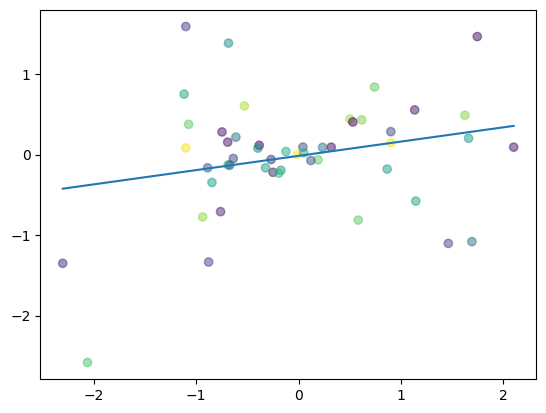

In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

# Creates 50 random x and y numbers
np.random.seed(1)
n = 50
x = np.random.randn(n)
y = x * np.random.randn(n)

# Makes the dots colorful
colors = np.random.rand(n)

# Plots best-fit line via polyfit
plt.plot(np.unique(x), np.poly1d(np.polyfit(x, y, 1))(np.unique(x)))

# Plots the random x and y data points we created
# Interestingly, alpha makes it more aesthetically pleasing
plt.scatter(x, y, c=colors, alpha=0.5)
plt.show()

<p style="font-family:ComicSansMS; font-size: 24px;"> Building a Linear Regression Model with PyTorch</p>

> Create a list of values from 0 to 11

In [2]:
x_values = [i for i in range(11)]

x_values

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10]

> Convert list of numbers to numpy array

In [3]:
# Convert to numpy
x_train = np.array(x_values, dtype=np.float32)
x_train.shape

(11,)

> Convert to 2-dimensional array

In [4]:
# IMPORTANT: 2D required
x_train = x_train.reshape(-1, 1)
x_train.shape

(11, 1)

> Create list of y values

In [5]:
y_values = [2*i + 1 for i in x_values]

y_values

[1, 3, 5, 7, 9, 11, 13, 15, 17, 19, 21]

> Alternative to create list of y values

In [6]:
# In case you're weak in list iterators...
y_values = []
for i in x_values:
    result = 2*i + 1
    y_values.append(result) 

y_values

[1, 3, 5, 7, 9, 11, 13, 15, 17, 19, 21]

> Convert to numpy array

In [7]:
y_train = np.array(y_values, dtype=np.float32)
y_train.shape

(11,)

> Reshape y numpy array to 2-dimension

In [8]:
# IMPORTANT: 2D required
y_train = y_train.reshape(-1, 1)
y_train.shape

(11, 1)

<p style="font-family:ComicSansMS; font-size: 24px;"> Building Model</p>

> Critical Imports

In [9]:
import torch
import torch.nn as nn

> Create Model

In [10]:
# Create class
class LinearRegressionModel(nn.Module):
    def __init__(self, input_dim, output_dim):
        super(LinearRegressionModel, self).__init__()
        self.linear = nn.Linear(input_dim, output_dim)  

    def forward(self, x):
        out = self.linear(x)
        return out

> Instantiate Model Class

In [11]:
input_dim = 1
output_dim = 1

model = LinearRegressionModel(input_dim, output_dim)

> Instantiate Loss Class

In [13]:
# MSE Loss: Mean Squared Error
criterion = nn.MSELoss()

> Instantiate Optimizer Class

In [14]:
# parameters = parameters - learning_rate * parameters_gradients
learning_rate = 0.01

optimizer = torch.optim.SGD(model.parameters(), lr=learning_rate)

> Train Model

In [15]:
# 1 epoch: going through the whole x_train data once

# 100 epochs:
# 100x mapping x_train = [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10]
# Process

# Convert inputs/labels to tensors with gradients
# Clear gradient buffers
# Get output given inputs
# Get loss
# Get gradients w.r.t. parameters
# Update parameters using gradients
# parameters = parameters - learning_rate * parameters_gradients
# REPEAT
epochs = 100
for epoch in range(epochs):
    epoch += 1
    # Convert numpy array to torch Variable
    inputs = torch.from_numpy(x_train).requires_grad_()
    labels = torch.from_numpy(y_train)

    # Clear gradients w.r.t. parameters
    optimizer.zero_grad() 

    # Forward to get output
    outputs = model(inputs)

    # Calculate Loss
    loss = criterion(outputs, labels)

    # Getting gradients w.r.t. parameters
    loss.backward()

    # Updating parameters
    optimizer.step()

    print('epoch {}, loss {}'.format(epoch, loss.item()))

epoch 1, loss 154.52987670898438
epoch 2, loss 12.61141300201416
epoch 3, loss 1.0354937314987183
epoch 4, loss 0.0912063866853714
epoch 5, loss 0.0141085684299469
epoch 6, loss 0.007745413575321436
epoch 7, loss 0.007152784150093794
epoch 8, loss 0.007031572982668877
epoch 9, loss 0.006949733477085829
epoch 10, loss 0.006871786434203386
epoch 11, loss 0.006795050110667944
epoch 12, loss 0.006719197612255812
epoch 13, loss 0.006644177716225386
epoch 14, loss 0.006569959688931704
epoch 15, loss 0.006496603600680828
epoch 16, loss 0.006424051709473133
epoch 17, loss 0.006352339405566454
epoch 18, loss 0.006281390320509672
epoch 19, loss 0.006211227271705866
epoch 20, loss 0.006141864228993654
epoch 21, loss 0.006073283031582832
epoch 22, loss 0.0060054645873606205
epoch 23, loss 0.005938408896327019
epoch 24, loss 0.005872093606740236
epoch 25, loss 0.0058065177872776985
epoch 26, loss 0.005741667468100786
epoch 27, loss 0.0056775533594191074
epoch 28, loss 0.005614153575152159
epoch 29,

> Looking at predicted values

In [16]:
# Purely inference
predicted = model(torch.from_numpy(x_train).requires_grad_()).data.numpy()
predicted

array([[ 1.093032 ],
       [ 3.0796347],
       [ 5.066237 ],
       [ 7.0528393],
       [ 9.039442 ],
       [11.026045 ],
       [13.012647 ],
       [14.999249 ],
       [16.985853 ],
       [18.972456 ],
       [20.959059 ]], dtype=float32)

> Looking at training values

In [17]:
# y = 2x + 1 
y_train

array([[ 1.],
       [ 3.],
       [ 5.],
       [ 7.],
       [ 9.],
       [11.],
       [13.],
       [15.],
       [17.],
       [19.],
       [21.]], dtype=float32)

> Plot of predicted and actual values

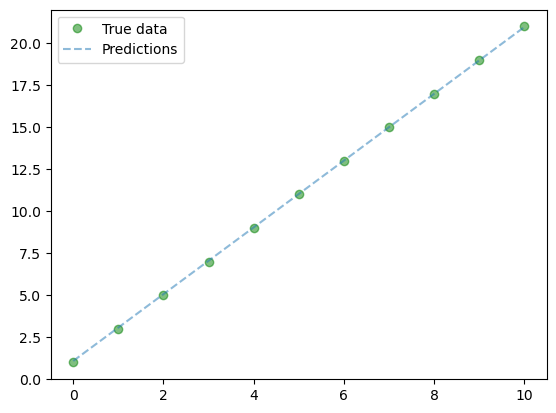

In [18]:
# Clear figure
plt.clf()

# Get predictions
predicted = model(torch.from_numpy(x_train).requires_grad_()).data.numpy()

# Plot true data
plt.plot(x_train, y_train, 'go', label='True data', alpha=0.5)

# Plot predictions
plt.plot(x_train, predicted, '--', label='Predictions', alpha=0.5)

# Legend and plot
plt.legend(loc='best')
plt.show()

> Save Model

In [19]:
save_model = False
if save_model is True:
    # Saves only parameters
    # alpha & beta
    torch.save(model.state_dict(), 'awesome_model.pkl')

> Load Model

In [20]:
load_model = False
if load_model is True:
    model.load_state_dict(torch.load('awesome_model.pkl'))

<p style="font-family:ComicSansMS; font-size: 24px;"> Building a Linear Regression Model with PyTorch (GPU)</p>

In [22]:
import torch
import torch.nn as nn

'''
STEP 1: CREATE MODEL CLASS
'''
class LinearRegressionModel(nn.Module):
    def __init__(self, input_dim, output_dim):
        super(LinearRegressionModel, self).__init__()
        self.linear = nn.Linear(input_dim, output_dim)  

    def forward(self, x):
        out = self.linear(x)
        return out

'''
STEP 2: INSTANTIATE MODEL CLASS
'''
input_dim = 1
output_dim = 1

model = LinearRegressionModel(input_dim, output_dim)

'''
STEP 3: INSTANTIATE LOSS CLASS
'''

criterion = nn.MSELoss()

'''
STEP 4: INSTANTIATE OPTIMIZER CLASS
'''

learning_rate = 0.01

optimizer = torch.optim.SGD(model.parameters(), lr=learning_rate)

'''
STEP 5: TRAIN THE MODEL
'''
epochs = 100
for epoch in range(epochs):
    epoch += 1
    # Convert numpy array to torch Variable
    inputs = torch.from_numpy(x_train).requires_grad_()
    labels = torch.from_numpy(y_train)

    # Clear gradients w.r.t. parameters
    optimizer.zero_grad() 

    # Forward to get output
    outputs = model(inputs)

    # Calculate Loss
    loss = criterion(outputs, labels)

    # Getting gradients w.r.t. parameters
    loss.backward()

    # Updating parameters
    optimizer.step()

    # Logging
    print('epoch {}, loss {}'.format(epoch, loss.item()))

epoch 1, loss 205.57894897460938
epoch 2, loss 16.84846305847168
epoch 3, loss 1.453416109085083
epoch 4, loss 0.19680553674697876
epoch 5, loss 0.0934341624379158
epoch 6, loss 0.08413846045732498
epoch 7, loss 0.08252570033073425
epoch 8, loss 0.08154934644699097
epoch 9, loss 0.08063424378633499
epoch 10, loss 0.07973343878984451
epoch 11, loss 0.07884304970502853
epoch 12, loss 0.07796252518892288
epoch 13, loss 0.0770920142531395
epoch 14, loss 0.07623115181922913
epoch 15, loss 0.075379878282547
epoch 16, loss 0.0745382234454155
epoch 17, loss 0.07370575517416
epoch 18, loss 0.07288269698619843
epoch 19, loss 0.07206882536411285
epoch 20, loss 0.07126390188932419
epoch 21, loss 0.07046815752983093
epoch 22, loss 0.06968136131763458
epoch 23, loss 0.06890329718589783
epoch 24, loss 0.06813371926546097
epoch 25, loss 0.06737305223941803
epoch 26, loss 0.0666205883026123
epoch 27, loss 0.06587660312652588
epoch 28, loss 0.06514102965593338
epoch 29, loss 0.06441346555948257
epoch 30